# Creating your own dataset from Google Images, Cleaning the dataset and Training a Model

## Download into file

Go to Google Images and search 'Bohemian Interior Design' and similarily for other classes. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press CtrlShiftJ in Windows/Linux and CmdOptJ in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

`urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));`

In [0]:
# Notebook magic commands
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [3]:
#mount google drive in case we need to store data or transfer files
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Create directory and upload urls file into your server
Choose an appropriate name for your labeled images. 

In [0]:
classes = [
    'Bohemian',
    'Classic',
    'Coastal',
    'Eclectic',
    'Farmhouse',
    'Glam',
    'Global',
    'Industrial',
    'Midcentury',
    'Minimal',
    'Modern',
    'Preppy',
    'Rustic',
    'Scandinavian',
    'Traditional',
    'Transitional']

In [0]:
path = Path('data/interior_designs')
for folder in classes:
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)

In [6]:
path.ls()

[PosixPath('data/interior_designs/Eclectic'),
 PosixPath('data/interior_designs/Midcentury'),
 PosixPath('data/interior_designs/Coastal'),
 PosixPath('data/interior_designs/Scandinavian'),
 PosixPath('data/interior_designs/Global'),
 PosixPath('data/interior_designs/Industrial'),
 PosixPath('data/interior_designs/Glam'),
 PosixPath('data/interior_designs/Traditional'),
 PosixPath('data/interior_designs/Preppy'),
 PosixPath('data/interior_designs/Classic'),
 PosixPath('data/interior_designs/Minimal'),
 PosixPath('data/interior_designs/Modern'),
 PosixPath('data/interior_designs/Bohemian'),
 PosixPath('data/interior_designs/Transitional'),
 PosixPath('data/interior_designs/Farmhouse'),
 PosixPath('data/interior_designs/Rustic')]

In [0]:
import shutil
src = 'drive/My Drive/fellowship/Interior_Design/'
dst = 'data/interior_designs/'
for file in classes:
  shutil.copy2(src+file+'.csv', dst)

In [8]:
for folder in classes:
  dest = path/folder
  file = folder+'.csv'
  download_images(path/file, dest, max_pics=250)

Error https://pre-tend.com/wp-content/uploads/2018/03/Modern-bohemian-interior-boho-chic.jpg HTTPSConnectionPool(host='pre-tend.com', port=443): Read timed out. (read timeout=4)
Error https://cdn2.lamag.com/wp-content/uploads/sites/6/2015/03/gypsylife-03.jpg HTTPSConnectionPool(host='cdn2.lamag.com', port=443): Read timed out. (read timeout=4)


Error https://cdn.freshome.com/wp-content/uploads/2018/08/design1-514x395-1.png HTTPSConnectionPool(host='cdn.freshome.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/08/design1-514x395-1.png (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f5ef7b0feb8>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error http://mybit.me/wp-content/uploads/2018/10/classic-interior-design-classic-interior-classic-style-interior-design-wikipedia.jpg HTTPConnectionPool(host='mybit.me', port=80): Max retries exceeded with url: /wp-content/uploads/2018/10/classic-interior-design-classic-interior-classic-style-interior-design-wikipedia.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f5ef6466e80>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))
Error http://dirgodaz.com/images/galleries/interior-design/arak-dirgodaz-firebricks-interior-de

Error https://designbx.com/wp-content/uploads/2017/11/James-coast-artwork.jpg HTTPSConnectionPool(host='designbx.com', port=443): Max retries exceeded with url: /wp-content/uploads/2017/11/James-coast-artwork.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f5ef6470e48>: Failed to establish a new connection: [Errno -5] No address associated with hostname',))
Error https://designbx.com/wp-content/uploads/2017/11/Pippas-Open-Plan-Coastal-Retreat-feature.jpg HTTPSConnectionPool(host='designbx.com', port=443): Max retries exceeded with url: /wp-content/uploads/2017/11/Pippas-Open-Plan-Coastal-Retreat-feature.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))


Error https://designbx.com/wp-content/uploads/2018/02/modern-eclectic-dining.jpg HTTPSConnectionPool(host='designbx.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/02/modern-eclectic-dining.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))


Error http://cdn.jessie-boo.com/decor/farmhouse-interior-design/alluring-farmhouse-interior-design-marvelous-home-ideas-on-home-decor-our-dream-images-rusti.jpg HTTPConnectionPool(host='cdn.jessie-boo.com', port=80): Max retries exceeded with url: /decor/farmhouse-interior-design/alluring-farmhouse-interior-design-marvelous-home-ideas-on-home-decor-our-dream-images-rusti.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f5ef6479710>: Failed to establish a new connection: [Errno -2] Name or service not known',))


Error https://homedesignboard.co/wp-content/uploads/2018/12/mystical-bedroom-decor-new-mystical-glam-living-room-fice-interior-design-for-manny-mua-of-mystical-bedroom-decor.jpg HTTPSConnectionPool(host='homedesignboard.co', port=443): Max retries exceeded with url: /wp-content/uploads/2018/12/mystical-bedroom-decor-new-mystical-glam-living-room-fice-interior-design-for-manny-mua-of-mystical-bedroom-decor.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error http://androidg.info/wp-content/uploads/glamorous-interior-design-glam-interior-design-styles-examples-cascade-coil.png HTTPConnectionPool(host='androidg.info', port=80): Max retries exceeded with url: /wp-content/uploads/glamorous-interior-design-glam-interior-design-styles-examples-cascade-coil.png (Caused by ReadTimeoutError("HTTPConnectionPool(host='androidg.info', port=80): Read timed out. (read timeout=4)",))


Error https://img.etimg.com/thumb/height-480,width-640,imgsize-134888,msid-61067784/.jpg HTTPSConnectionPool(host='img.etimg.com', port=443): Read timed out. (read timeout=4)
Error https://media.bloomsbury.com/rep/bj/9781609011383.jpg HTTPSConnectionPool(host='media.bloomsbury.com', port=443): Max retries exceeded with url: /rep/bj/9781609011383.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f5ef64797b8>: Failed to establish a new connection: [Errno 101] Network is unreachable',))
Error https://fioriinteriordesign.com/wp-content/uploads/2019/03/Global-Reflection-North-Caldwell-NJ-Residence-seating2.jpg HTTPSConnectionPool(host='fioriinteriordesign.com', port=443): Read timed out. (read timeout=4)


Error https://www.furnishburnish.com/wp-content/uploads/2012/07/industrial-design-decor-ideas11.jpg HTTPSConnectionPool(host='www.furnishburnish.com', port=443): Max retries exceeded with url: /wp-content/uploads/2012/07/industrial-design-decor-ideas11.jpg (Caused by SSLError(CertificateError("hostname 'www.furnishburnish.com' doesn't match either of '*.directnic.com', 'directnic.com'",),))
Error https://www.comfortel.com.au/wp-content/uploads/2018/07/raw-ubran-Large-1.png HTTPSConnectionPool(host='www.comfortel.com.au', port=443): Max retries exceeded with url: /wp-content/uploads/2018/07/raw-ubran-Large-1.png (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f5ef64cea58>: Failed to establish a new connection: [Errno -5] No address associated with hostname',))
Error https://www.scaramangashop.co.uk/Fashion-and-Furniture-Blog/wp-content/uploads/324.jpg HTTPConnectionPool(host='www.scaramangashop.co.uk', port=80): Max retries exceeded with url: / (C

Error http://globalads.info/wp-content/uploads/2018/05/mid-century-modern-interior-designers-design-news-notes-home.jpg HTTPConnectionPool(host='www.globalads.info', port=80): Max retries exceeded with url: /wp-content/uploads/2018/05/mid-century-modern-interior-designers-design-news-notes-home.jpg (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',)))
Error https://furnitureoutletstores.co.uk/wp-content/uploads/2019/04/awesome-examples-of-mid-century-modern-interiors-blog.jpg HTTPSConnectionPool(host='furnitureoutletstores.co.uk', port=443): Read timed out. (read timeout=4)


Error https://freelancers3d.com/uploads/projects/2_34bf35b0939ba0b3735d83c38db7d9e1.jpg HTTPSConnectionPool(host='freelancers3d.com', port=443): Max retries exceeded with url: /uploads/projects/2_34bf35b0939ba0b3735d83c38db7d9e1.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://fedordesign.com/images/Full/minimal1.jpg HTTPSConnectionPool(host='fedordesign.com', port=443): Max retries exceeded with url: /images/Full/minimal1.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f5ef7b0ff60>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))


Error https://epignite.com/wp-content/uploads/2018/11/smart-preppy-bedroom-beautiful-modern-living-room-cabinet-designs-paradornsrichaphan-and-contemporary-preppy-bedroom-ideas-combinations.jpg HTTPSConnectionPool(host='epignite.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/11/smart-preppy-bedroom-beautiful-modern-living-room-cabinet-designs-paradornsrichaphan-and-contemporary-preppy-bedroom-ideas-combinations.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f5ef7b0fcc0>: Failed to establish a new connection: [Errno -5] No address associated with hostname',))


Error http://ferrezers.com/wp-content/uploads/2016/11/Pleasant-Rustic-Interior-Design-Stunning-Interior-Decor-Home-.jpg HTTPConnectionPool(host='ferrezers.com', port=80): Max retries exceeded with url: /wp-content/uploads/2016/11/Pleasant-Rustic-Interior-Design-Stunning-Interior-Decor-Home-.jpg (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',)))


Error https://www.invaluable.com/blog/wp-content/uploads/2019/02/scandinavian-decor-hero.jpg HTTPSConnectionPool(host='www.invaluable.com', port=443): Read timed out. (read timeout=4)
Error https://designbx.com/wp-content/uploads/2017/06/DESIGNBX_SCANDINAVIAN_STYLE_TREND.jpg HTTPSConnectionPool(host='designbx.com', port=443): Max retries exceeded with url: /wp-content/uploads/2017/06/DESIGNBX_SCANDINAVIAN_STYLE_TREND.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))


Error http://coisasdeblogueiras.com/wp-content/uploads/2018/05/How-To-Achieve-A-Haughty-Traditional-Interior-Design-Photos.jpg HTTPConnectionPool(host='coisasdeblogueiras.com', port=80): Max retries exceeded with url: /wp-content/uploads/2018/05/How-To-Achieve-A-Haughty-Traditional-Interior-Design-Photos.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f5ef7b31400>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error https://designbx.com/wp-content/uploads/2018/02/traditional-interior-bedroom-1024x682.jpg HTTPSConnectionPool(host='designbx.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/02/traditional-interior-bedroom-1024x682.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f5ef7b31518>: Failed to establish a new connection: [Errno -5] No address associated with hostname',))
Error https://eliteaceclean.com/wp-content/uploads/2018/12/traditional-interio

We can remove any images that can't be opened:



In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=512)

## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=(224,224), num_workers=4).normalize(imagenet_stats)

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Bohemian',
  'Classic',
  'Coastal',
  'Eclectic',
  'Farmhouse',
  'Glam',
  'Global',
  'Industrial',
  'Midcentury',
  'Minimal',
  'Modern',
  'Preppy',
  'Rustic',
  'Scandinavian',
  'Traditional',
  'Transitional'],
 16,
 2904,
 725)

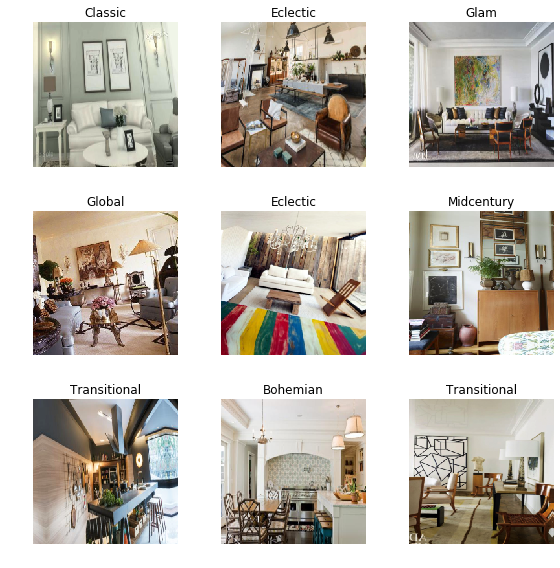

In [12]:
data.show_batch(rows=3, figsize=(8,8))

## Train model

In [16]:
learn = cnn_learner(data, models.resnet18, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 80205476.21it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.45E-03


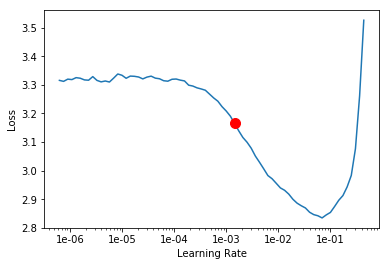

In [14]:
learn.freeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [17]:
learn.fit_one_cycle(5, max_lr=1e-02)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.688739,2.272578,0.680000,0.320000,10:47
1,2.307351,2.219154,0.674483,0.325517,10:47
2,2.079324,2.073966,0.633103,0.366897,10:43
3,1.850641,1.911467,0.606897,0.393103,10:44
4,1.644395,1.901244,0.590345,0.409655,10:45


In [0]:
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-06


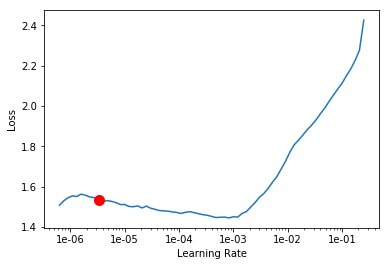

In [19]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [20]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.480577,1.894678,0.587586,0.412414,13:40
1,1.479056,1.901124,0.600000,0.400000,13:39
2,1.414791,1.881802,0.593103,0.406897,13:41
3,1.351565,1.877063,0.573793,0.426207,13:45
4,1.306043,1.875795,0.584828,0.415172,13:45


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');
interp = ClassificationInterpretation.from_learner(learn)

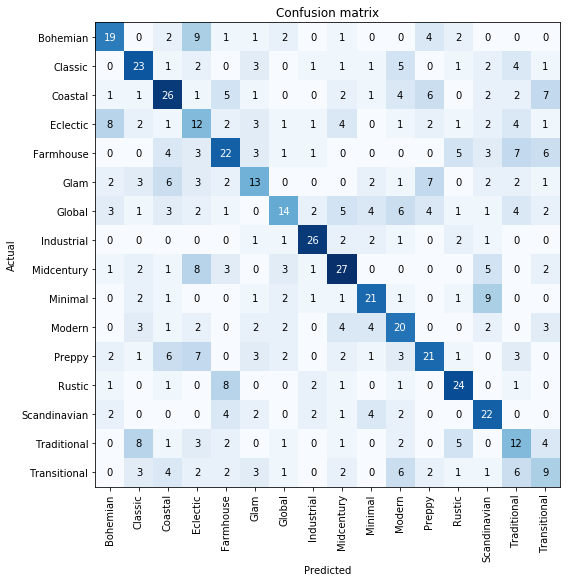

In [12]:
interp.plot_confusion_matrix(figsize=(8,8))

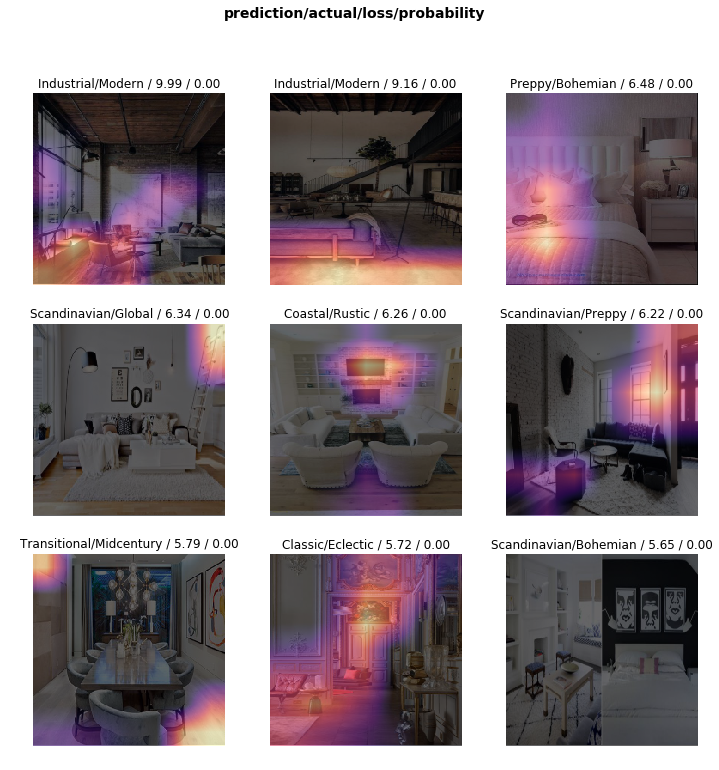

In [23]:
interp.plot_top_losses(9, figsize=(12,12))

## Cleaning Up - Manually
Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the ImageCleaner widget from fastai.widgets we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. We can do this with .from_toplosses. We then feed the top losses indexes and corresponding dataset to ImageCleaner.

Notice that the widget will not delete images directly from disk but it will create a new csv file cleaned.csv from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the ds_type param which no longer has any effect.

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

Then we create a new learner to use our new databunch with all the images.

In [0]:
learn_cln = cnn_learner(db, models.resnet18, metrics=error_rate)
learn_cln.load('stage-2')

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Let's remove top 629 images and load rest in new csv file

In [0]:
paths=[]
labels=[]
for id in idxs[629:3629]:
  y = str(db.train_ds.x.items[id]).split('/')
  k = y[2]+"/"+y[3]
  paths.append(k)
  labels.append(db.train_ds.y.items[id])
d = {'Path':paths,'Label':labels}
df = pd.DataFrame(d)

In [0]:
lb = {
  0:'Bohemian',
  1:'Classic',
  2:'Coastal',
  3:'Eclectic',
  4:'Farmhouse',
  5:'Glam',
  6:'Global',
  7:'Industrial',
  8:'Midcentury',
  9:'Minimal',
  10:'Modern',
  11:'Preppy',
  12:'Rustic',
  13:'Scandinavian',
  14:'Traditional',
  15:'Transitional'}
df['Label'] = df['Label'].map(lb)
df.to_csv('data/interior_designs/cleaned.csv', index=False)

Delete Manually as the widgets don't work on collab.

In [0]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                    .split_none()
                    .label_from_df()
                    .transform(get_transforms(), size=224)
                    .databunch()
      )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2')

In [64]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


Removing duplicates from the list of indexes is difficult as the combinations in the list are not unique. So we don't remove duplicates.

Remember to recreate your ImageDataBunch from your cleaned.csv to include the changes you made in your data!

## Model Training on Cleaned Dataset

In [0]:
# If you already cleaned your data, run this cell
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
                               ds_tfms=get_transforms(), size=(224,224), num_workers=4).normalize(imagenet_stats)

In [33]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Bohemian',
  'Classic',
  'Coastal',
  'Eclectic',
  'Farmhouse',
  'Glam',
  'Global',
  'Industrial',
  'Midcentury',
  'Minimal',
  'Modern',
  'Preppy',
  'Rustic',
  'Scandinavian',
  'Traditional',
  'Transitional'],
 16,
 2400,
 600)

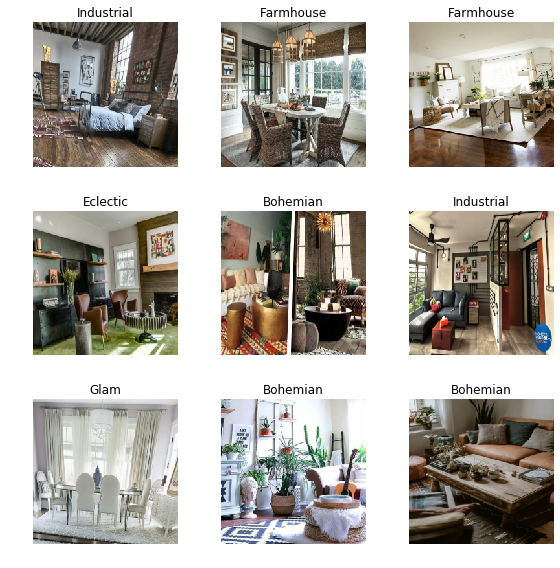

In [34]:
data.show_batch(rows=3, figsize=(8,8))

In [0]:
learn.load('stage-2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-02


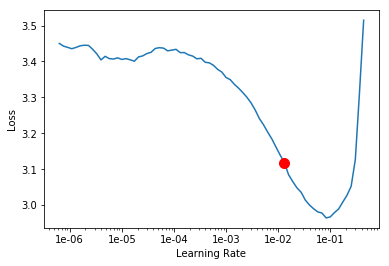

In [36]:
learn.freeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,1.336688,1.480948,0.508333,08:35
1,1.546077,2.015288,0.378333,08:42
2,1.557309,1.723941,0.445000,08:38
3,1.397669,1.571981,0.511667,08:33
4,1.261284,1.529571,0.526667,08:34


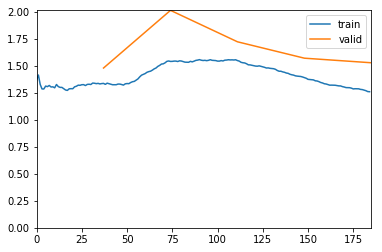

Better model found at epoch 0 with accuracy value: 0.5083333253860474.
Better model found at epoch 3 with accuracy value: 0.5116666555404663.
Better model found at epoch 4 with accuracy value: 0.5266666412353516.


In [39]:
from fastai.callbacks import *
learn.fit_one_cycle(5, max_lr=1e-02, callbacks=[ShowGraph(learn), SaveModelCallback(learn, mode='max', every='improvement', monitor='accuracy', name='Stage1-1')])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06


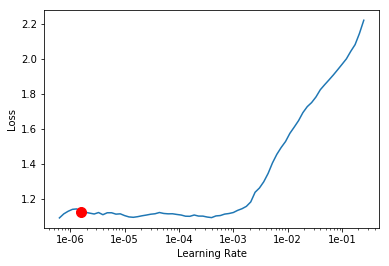

In [42]:
learn.load('Stage1-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,1.084438,1.518092,0.531667,11:23
1,1.088779,1.525433,0.518333,11:41
2,1.036607,1.515477,0.516667,12:07
3,0.975516,1.515557,0.520000,12:00
4,0.955559,1.520208,0.525000,11:44


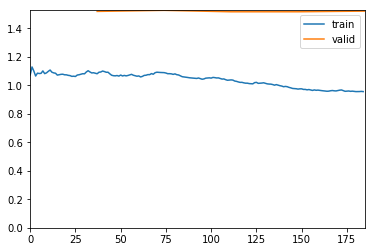

Better model found at epoch 0 with accuracy value: 0.5316666960716248.


In [43]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4), callbacks=[ShowGraph(learn), SaveModelCallback(learn, mode='max', every='improvement', monitor='accuracy', name='Stage1-2')])

epoch,train_loss,valid_loss,accuracy,time
0,1.093938,1.520910,0.525000,12:25
1,1.076301,1.519202,0.528333,12:28
2,1.059930,1.518023,0.526667,12:28
3,1.066213,1.522608,0.531667,12:28
4,1.059322,1.523193,0.526667,12:27
5,1.055189,1.517440,0.523333,12:25
6,1.037743,1.509496,0.528333,12:27
7,1.033433,1.517492,0.526667,12:26
8,1.031533,1.506959,0.528333,12:28
9,1.036433,1.514221,0.526667,12:27


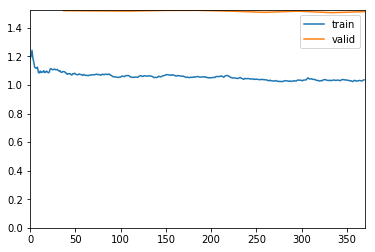

Better model found at epoch 0 with accuracy value: 0.5249999761581421.
Better model found at epoch 1 with accuracy value: 0.528333306312561.
Better model found at epoch 3 with accuracy value: 0.5316666960716248.


In [44]:
learn.load('Stage1-2')
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-5), callbacks=[ShowGraph(learn), SaveModelCallback(learn, mode='max', every='improvement', monitor='accuracy', name='Stage1-3')])

## Interpretation for Cleaned Dataset

In [0]:
learn.load('Stage1-3');
interp = ClassificationInterpretation.from_learner(learn)

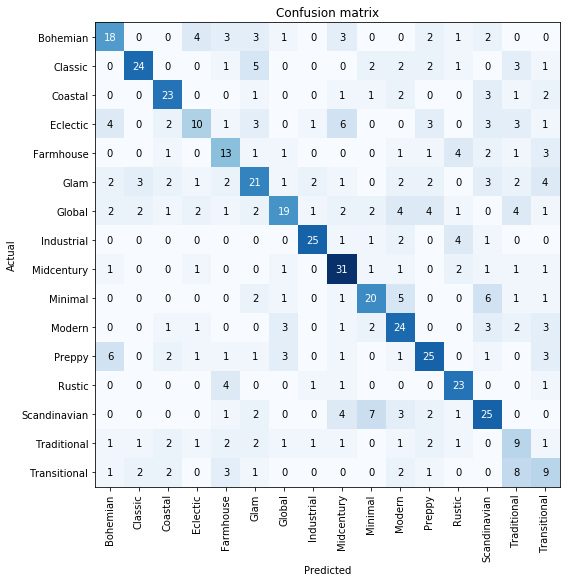

In [58]:
interp.plot_confusion_matrix(figsize=(8,8))

## Putting your model in production
First thing first, let's export the content of our Learner object for production:

In [0]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

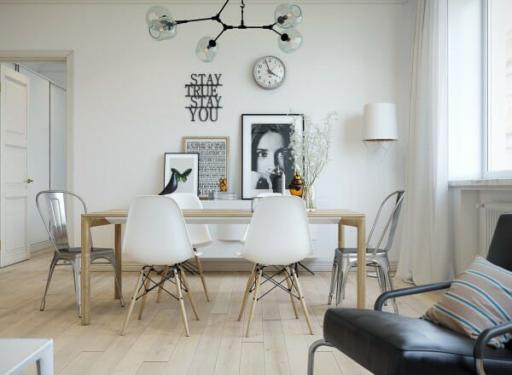

In [54]:
#defaults.device = torch.device('cpu')
img = open_image(path/'Scandinavian/00000005.jpg')
img

We create our Learner in production enviromnent like this, just make sure that path contains the file 'export.pkl' from before.



In [0]:
learn = load_learner(path)

In [56]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Scandinavian